## New york Fordgobike 2019 data analysis

### Investigation Overview

###### In this investigation, I wanted to look at the most user characteristics are the best in predicting the trip duration, and how this characteristics are related with rental time period, also im intersted to study what feature among added weather features are the best in predicting the daily trip count and the total daily rent time. 


### Dataset Overview
##### The dataset is a recodrs of 369969 trips the attributes included the trip informations as date, strat/end trip time, start/end trip station, as well as additional information about users like gender, type and birthday and added weather informations like temperature, wind speed, humidity, precipitations. 34978 data points were removed from the analysis due to inconsistencies or missing information.

In [ ]:
# import packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt
import datetime
# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [ ]:
df=pd.read_csv('NY_Bike_dataset_2019_clean.csv')

## Distribution of trip count

Trip duration in this dataset take a range from 1 to 240 min at the highest. Plotted on a logarithmic scale, the distribution of trip duration takes on a unimodal shape.

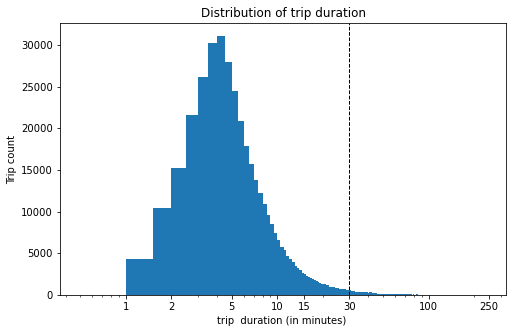

In [29]:

# start with a standard-scaled plot

binsize = 0.5
bins = np.arange(0, df['trip_duration'].max()/60+binsize, binsize)
ticks=[1,2,5,10,15,30,100, 250]
duration_min=df['trip_duration']/60
plt.figure(figsize=[8, 5])
plt.hist(duration_min , bins=bins)
plt.xlabel('trip  duration (in minutes) ')
plt.ylabel('Trip count')
plt.title('Distribution of trip duration')

plt.axvline(30, color='k', linestyle='dashed', linewidth=1)
plt.xscale('log')
plt.xticks(ticks, ticks)
plt.show()


### Poucentage of users by periods age, gender and type

- Young and middle-aged adults contributed the majority of service users in 2019 with 47.35% and 45.23% respectively, on other hand old and adolescent are rarely observed in this dataset with 7.37% and 0.04% respectively.  
- Males are the most present gender in this dataset with a percentage of 70.81% followed by females with a percentage of 22.77% however there remains another percentage of 6.42% identified as 'unknown'.
-Subscriber dominate with 89,48% while pourcentage of custumers is 10.52%.

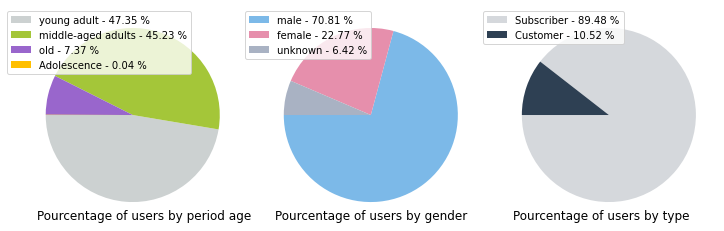

In [40]:
fig, axs = plt.subplots(ncols=3, figsize=[20, 20] );
fig.tight_layout( w_pad=1)
fig.set_figwidth(10)
user_carac=['periods_age', 'gender_cath', 'user_type']
titles=['period age', 'gender', 'type']
colors =[['#CCD1D1','#A4C639','#9966CC', '#FFBF00'], 
        ['#7CB9E8','#E68FAC','#A9B2C3', '#FFBF00'],['#D5D8DC', '#2E4053']]
for i in range (3):
    
    x=df[user_carac[i]].value_counts().index
    y=df[user_carac[i]].value_counts()
    porcent = 100.*y/y.sum()
    patches, texts =axs[i].pie(y, startangle=180, colors=colors[i]);
    labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]
    axs[i].legend(patches, labels, loc='upper left', bbox_to_anchor=(-0.1, 1.),
               fontsize=5, prop={'size': 10})

    axs[i].text(-1.1, -1.2, 'Pourcentage of users by {}'.format(titles[i]), fontsize=12);



### Time-dependent use
- The use according to the month of year shows peaks in August and September, unlike February which recorded the lowest number of trips
- Tuesday, Wednesday and Friday recorded the highest number of trips while Sunday, which represents the day of the week that recorded the lowest number of trips
- According to hourly usage, 8 a.m,  5 p.m. and 6 p.m. recorded peaks of use

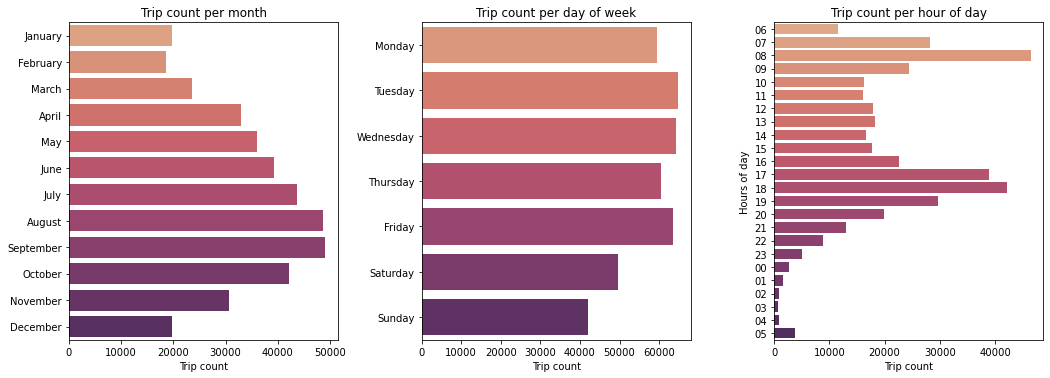

In [57]:
fig, axs = plt.subplots(ncols=3, figsize=[22, 5])
fig.tight_layout( w_pad=10)
fig.set_figwidth(14)
df['start_time']=pd.to_datetime(df['start_time'])
moy=df.start_time.dt.strftime('%B')
dow=df.start_time.dt.strftime('%A')
order_dow=['Monday','Tuesday','Wednesday',
          'Thursday','Friday','Saturday','Sunday']
hod=df.start_time.dt.strftime('%H')
hour_list=['06','07','08', '09','10', '11', '12', '13', '14', '15', '16',
           '17', '18', '19', '20', '21', '22', '23', '00', '01', '02', '03',
          '04', '05']
sns.color_palette("flare", as_cmap=True)

sns.countplot(y=moy, ax=axs[0], palette= "flare")
axs[0].set_title('Trip count per month');
axs[0].set_xlabel('Trip count')
axs[0].set_ylabel('')


sns.countplot(y=dow, ax=axs[1], order=order_dow, palette= "flare")
axs[1].set_title('Trip count per day of week');
axs[1].set_xlabel('Trip count')
axs[1].set_ylabel('')

sns.countplot(y=hod, ax=axs[2], order=hour_list, palette= "flare")
axs[2].set_title('Trip count per hour of day')
axs[2].set_xlabel('Trip count')
axs[2].set_ylabel('Hours of day');

###  Daily trip count and weather relationship
 There is a strong relationship between the temperature and the daily trip count, this relationship will predict the number of trips according to the daily temperature, another relationship also exists with humidity but to a lesser degree.

In [31]:
#set a new data frame with daily trip count and weathe features average 
df_count=df.groupby('date').agg(trip_count=('trip_duration', 'size'),
                                humidity_avg=('humidity', 'mean'),
                                temperature_avg=('temperature', 'mean'),
                                precipitation_avg=('precipitation', 'mean'),
                                wind_speed_avg=('wind_speed', 'mean'),
                                total_rent_time=('trip_duration', 'sum'),
                                total_traveled_distance=('distance', 'sum')
                               ).reset_index() 

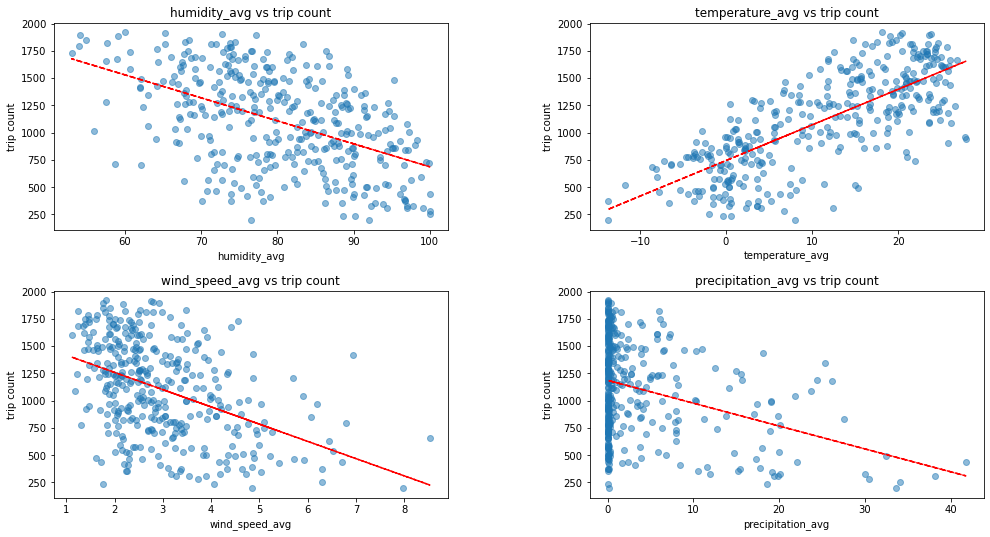

In [53]:
#Scatter plot for trip count and every weather features 
f, axes= plt.subplots(nrows = 2, ncols = 2, figsize=[8,8])
f.tight_layout(pad=4)
f.set_figwidth(16)
features_list=['humidity_avg', 'temperature_avg', 'wind_speed_avg', 'precipitation_avg' ]
feature=0
for i in range (2):
    for j in range (2):
        x=df_count[features_list[feature]]
        y=df_count['trip_count']
        z = np.polyfit(x, y, 1)
        p = np.poly1d(z)
        axes[i,j].scatter(data=df_count, x=features_list[feature], y='trip_count', alpha=0.5)
        axes[i,j].set_title(features_list[feature]+ ' vs trip count')
        axes[i,j].set_xlabel(features_list[feature])
        axes[i,j].set_ylabel('trip count')
        axes[i,j].plot(x,p(x),"r--")
        feature+=1


### Total daily rent time, temperature and age relationship by gender

 - Total daily rent time is strongly related to temperature. 
 - the relationship between temperature and total daily rent time is positive, the more the temperature increases the more the total daily rent time increases in parallel. 
 - The ratio of females is significantly related to temperature the more the temperature increases the more the ratio of females increases in parallel. 
 - For both male and female the more the temperature the more the average age of the users decreases.

In [33]:
#group by date and gender and use agregat to calculate the daily trip count, the mean of weather features and age and the sum of trip duration and distance
df_gender=df.groupby(['date', 'gender_cath']).agg(trip_count=('trip_duration', 'size'),
                                humidity_avg=('humidity', 'mean'),
                                temperature_avg=('temperature', 'mean'),
                                precipitation_avg=('precipitation', 'mean'),
                                wind_speed_avg=('wind_speed', 'mean'),
                                total_rent_time=('trip_duration', 'sum'),
                                total_traveled_distance=('distance', 'sum'),
                                age_avg=('age', 'mean')
                               ).reset_index() 

#pivot df_gender in order to have specific aggregated feature for each unique gender in columns and each unique date in rows
table_gender=pd.pivot_table(df_gender, index=['date'], columns=['gender_cath'],
                     values=['trip_count', 'total_rent_time', 'total_traveled_distance',
                            'humidity_avg', 'temperature_avg', 'precipitation_avg',
                            'wind_speed_avg', 'age_avg'], 
                     aggfunc={'trip_count': np.mean,'total_rent_time':np.sum, 'total_traveled_distance':np.sum,
                            'humidity_avg':np.mean, 'temperature_avg':np.mean, 'precipitation_avg':np.mean,
                            'wind_speed_avg':np.mean,
                             'age_avg': np.mean}
                    ).reset_index()
#Drop level 0 columns index
table_gender.columns=table_gender.columns.droplevel(0)
#Set a list of new columns names
col_names=['date',
           'age_avg_f', 'age_avg_m', 'age_avg_u',
           'humidity','humidity_m','humidity_u',
           'precipitation', 'precipitation_m', 'precipitation_u',
           'temperature', 'temperature_m', 'temperature_u',
           'total_rent_time_f', 'total_rent_time_m', 'total_rent_time_u',
           'total_traveled_distance_f', 'total_traveled_distance_m', 'total_traveled_distance_u',
           'trip_count_f', 'trip_count_m', 'trip_count_u',
           'wind_speed', 'wind_speed_m', 'wind_speed_u']
#rename columns
table_gender.columns=col_names
#Drop duplicated columns
drop_columns=['humidity_m','humidity_u', 'precipitation_m', 'precipitation_u', 
             'temperature_m', 'temperature_u', 'wind_speed_m', 'wind_speed_u' ]
table_gender.drop(drop_columns, axis='columns', inplace=True)
#Create a new columns to calculate gender ratio for each day
table_gender['female_ratio']=table_gender['trip_count_f']/(table_gender['trip_count_f']+table_gender['trip_count_m']+ table_gender['trip_count_u'])
table_gender['male_ratio']=table_gender['trip_count_m']/(table_gender['trip_count_f']+table_gender['trip_count_m']+ table_gender['trip_count_u'])
table_gender['unknown_ratio']=table_gender['trip_count_u']/(table_gender['trip_count_f']+table_gender['trip_count_m']+ table_gender['trip_count_u'])


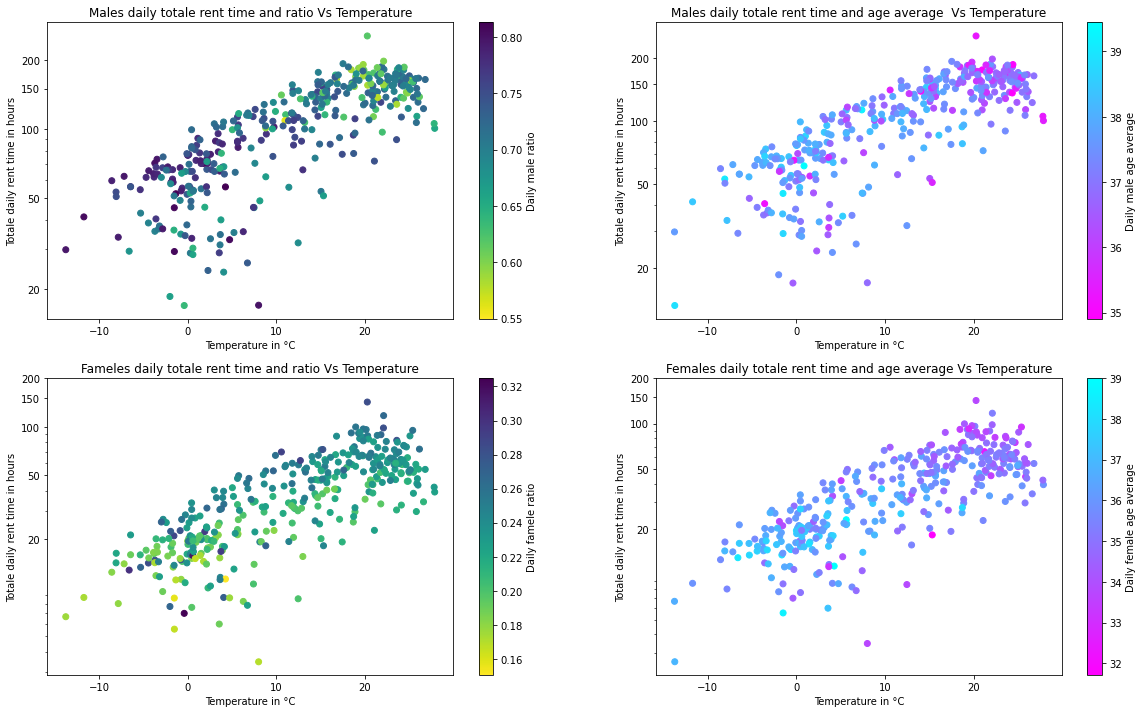

In [46]:
ticks=[20,50,100,150, 200]

fig, ax = plt.subplots(2,2, figsize=(20,12))

#Plotting Males daily totale rent time and ratio Vs Temperature
male_plt=ax[0,0].scatter( c=table_gender['male_ratio'], x=table_gender['temperature'], y=table_gender['total_rent_time_m']/3600, cmap='viridis_r')
ax[0,0].set_ylabel("Totale daily rent time in hours")
ax[0,0].set_title("Males daily totale rent time and ratio Vs Temperature")
ax[0,0].set_xlabel("Temperature in °C")
ax[0,0].set_yscale('log')
ax[0,0].set_yticks(ticks)
ax[0,0].set_yticklabels(ticks)
cbar=fig.colorbar(male_plt, ax=ax[0,0])
cbar.set_label('Daily male ratio', rotation=90)


#Plotting Males daily totale rent time and age average  Vs Temperature
male_plt=ax[0,1].scatter( c=table_gender['age_avg_m'], x=table_gender['temperature'], y=table_gender['total_rent_time_m']/3600, cmap='cool_r')
ax[0,1].set_ylabel("Totale daily rent time in hours")
ax[0,1].set_title("Males daily totale rent time and age average  Vs Temperature")
ax[0,1].set_xlabel("Temperature in °C")
ax[0,1].set_yscale('log')
ax[0,1].set_yticks(ticks)
ax[0,1].set_yticklabels(ticks)
cbar=fig.colorbar(male_plt, ax=ax[0,1])
cbar.set_label('Daily male age average', rotation=90)

#Plotting Fameles daily totale rent time and ratio Vs Temperature
female_plt=ax[1,0].scatter( c=table_gender['female_ratio'], x=table_gender['temperature'], y=table_gender['total_rent_time_f']/3600, cmap='viridis_r')
ax[1,0].set_ylabel("Totale daily rent time in hours")
ax[1,0].set_title("Fameles daily totale rent time and ratio Vs Temperature")
ax[1,0].set_xlabel("Temperature in °C")
ax[1,0].set_yscale('log')
ax[1,0].set_yticks(ticks)
ax[1,0].set_yticklabels(ticks)
cbar=fig.colorbar(female_plt, ax=ax[1,0])
cbar.set_label('Daily famele ratio', rotation=90)

#Plotting Females daily totale rent time and age average Vs Temperature
female_plt=ax[1,1].scatter( c=table_gender['age_avg_f'], x=table_gender['temperature'], y=table_gender['total_rent_time_f']/3600, cmap='cool_r')
ax[1,1].set_ylabel("Totale daily rent time in hours")
ax[1,1].set_title("Females daily totale rent time and age average Vs Temperature")
ax[1,1].set_xlabel("Temperature in °C")
ax[1,1].set_yscale('log')
ax[1,1].set_yticks(ticks)
ax[1,1].set_yticklabels(ticks)
cbar=fig.colorbar(female_plt, ax=ax[1,1])
cbar.set_label('Daily female age average', rotation=90)

### Total daily rent time, temperature and age relationship by user type

 - for subscriber and custumers more the temperature increases more the total daily rent time increases 
 - More the temperature increases more the custumers ratio increases and the subscriber ratio decrease
 - More the temperature increases more the subscriber age average decreases on the other hand more the temperature increases, more the custumers average age increases. 


In [35]:
df_type=df.groupby(['date', 'user_type']).agg(trip_count=('trip_duration', 'size'),
                                humidity_avg=('humidity', 'mean'),
                                temperature_avg=('temperature', 'mean'),
                                precipitation_avg=('precipitation', 'mean'),
                                wind_speed_avg=('wind_speed', 'mean'),
                                total_rent_time=('trip_duration', 'sum'),
                                total_traveled_distance=('distance', 'sum'),
                                age_avg=('age', 'mean')
                               ).reset_index() 

#pivot df_type in order to have specific aggregated feature for each unique user type in columns and each unique date in rows
table_type=pd.pivot_table(df_type, index=['date'], columns=['user_type'],
                     values=['trip_count', 'total_rent_time', 'total_traveled_distance',
                            'humidity_avg', 'temperature_avg', 'precipitation_avg',
                            'wind_speed_avg', 'age_avg'], 
                     aggfunc={'trip_count': np.mean,'total_rent_time':np.sum, 'total_traveled_distance':np.sum,
                            'humidity_avg':np.mean, 'temperature_avg':np.mean, 'precipitation_avg':np.mean,
                            'wind_speed_avg':np.mean,
                             'age_avg': np.mean}
                    ).reset_index()
#Drop level 0 columns index
table_type.columns=table_type.columns.droplevel(0)
#Set a list of new columns names
col_names=['date',
'age_avg_c', 'age_avg_s',           
'humidity','humidity_s', 
'precipitation', 'precipitation_s',
'temperature', 'temperature_s',
'total_rent_time_c', 'total_rent_time_s', 
'total_traveled_distance_c', 'total_traveled_distance_s', 
'trip_count_c', 'trip_count_s',
'wind_speed', 'wind_speed_s']
#rename columns
table_type.columns=col_names

#Drop duplicated columns
drop_columns=['humidity_s', 'precipitation_s', 'temperature_s', 'wind_speed_s' ]
table_type.drop(drop_columns, axis='columns', inplace=True)

#Create a new columns to calculate gender ratio for each day
table_type['custumer_ratio']=table_type['trip_count_c']/(table_type['trip_count_c']+table_type['trip_count_s'])
table_type['subscriber_ratio']=table_type['trip_count_s']/(table_type['trip_count_c']+table_type['trip_count_s'])


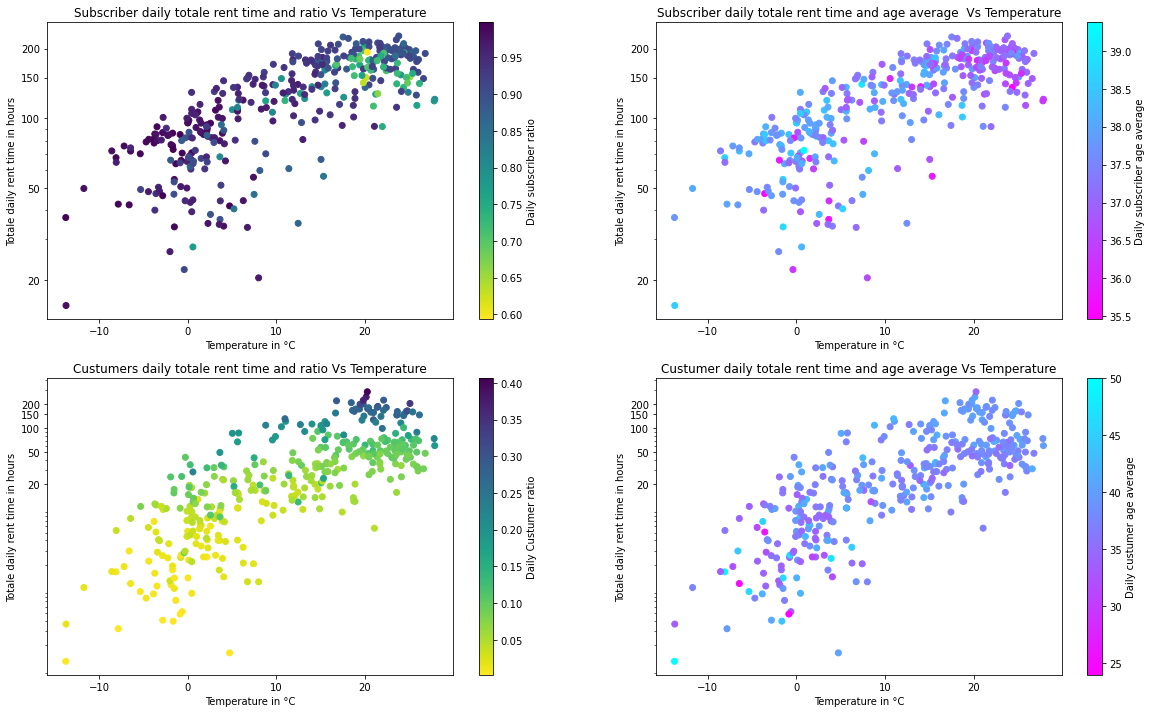

In [47]:
ticks=[20,50,100,150, 200]
total_rent_time=(table_type['total_rent_time_s']+table_type['total_rent_time_c'])/3600
fig, ax = plt.subplots(2,2, figsize=(20,12))

#Plotting Subscriber daily totale rent time and ratio Vs Temperature
Subscriber_plt=ax[0,0].scatter( c=table_type['subscriber_ratio'], x=table_type['temperature'], y=table_type['total_rent_time_s']/3600, cmap='viridis_r')
ax[0,0].set_ylabel("Totale daily rent time in hours")
ax[0,0].set_title("Subscriber daily totale rent time and ratio Vs Temperature")
ax[0,0].set_xlabel("Temperature in °C")
ax[0,0].set_yscale('log')
ax[0,0].set_yticks(ticks)
ax[0,0].set_yticklabels(ticks)
cbar=fig.colorbar(Subscriber_plt, ax=ax[0,0])
cbar.set_label('Daily subscriber ratio', rotation=90)


#Plotting Subscriber daily totale rent time and age average  Vs Temperature
Subscriber_plt=ax[0,1].scatter( c=table_type['age_avg_s'], x=table_type['temperature'], y=table_type['total_rent_time_s']/3600, cmap='cool_r')
ax[0,1].set_ylabel("Totale daily rent time in hours")
ax[0,1].set_title("Subscriber daily totale rent time and age average  Vs Temperature")
ax[0,1].set_xlabel("Temperature in °C")
ax[0,1].set_yscale('log')
ax[0,1].set_yticks(ticks)
ax[0,1].set_yticklabels(ticks)
cbar=fig.colorbar(Subscriber_plt, ax=ax[0,1])
cbar.set_label('Daily subscriber age average', rotation=90)

#Plotting Custumers daily totale rent time and ratio Vs Temperature
Custumer_plt=ax[1,0].scatter( c=table_type['custumer_ratio'], x=table_type['temperature'], y=table_type['total_rent_time_c']/3600, cmap='viridis_r')
ax[1,0].set_ylabel("Totale daily rent time in hours")
ax[1,0].set_title("Custumers daily totale rent time and ratio Vs Temperature")
ax[1,0].set_xlabel("Temperature in °C")
ax[1,0].set_yscale('log')
ax[1,0].set_yticks(ticks)
ax[1,0].set_yticklabels(ticks)
cbar=fig.colorbar(Custumer_plt, ax=ax[1,0])
cbar.set_label('Daily Custumer ratio', rotation=90)

#Plotting Custumer daily totale rent time and age average Vs Temperature
Custumer_plt=ax[1,1].scatter( c=table_type['age_avg_c'], x=table_type['temperature'], y=table_type['total_rent_time_c']/3600, cmap='cool_r')
ax[1,1].set_ylabel("Totale daily rent time in hours")
ax[1,1].set_title("Custumer daily totale rent time and age average Vs Temperature")
ax[1,1].set_xlabel("Temperature in °C")
ax[1,1].set_yscale('log')
ax[1,1].set_yticks(ticks)
ax[1,1].set_yticklabels(ticks)
cbar=fig.colorbar(Custumer_plt, ax=ax[1,1])
cbar.set_label('Daily custumer age average', rotation=90)

### Total daily rent time and temperature  relationship by day type

> - For low temperatures (between -10 and 5 °C) the total rent time is higher in the week-days 
> - For high temperatures (higher than 5 °C) the total rent time is higher during the weekends

In [37]:
day_dict={0:'Monday', 1:'Tuesday', 2:'Wednesday',
          3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
table_gender['weekday']=pd.to_datetime(table_gender['date']).dt.dayofweek
table_gender.replace({"weekday": day_dict}, inplace=True)
table_gender['day_type']=table_gender['weekday'].apply(lambda x: 'Week-day' if x in ['Monday', 'Tuesday','Wednesday', 'Thursday', 'Friday'] else 'Week-end')

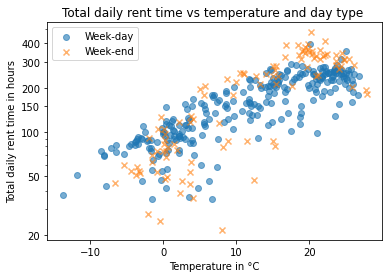

In [38]:
total_rent_time=table_gender['total_rent_time_f']+table_gender['total_rent_time_m']+table_gender['total_rent_time_u']

day_markers = [['Week-day', 'o'],
               ['Week-end', 'x']]
ticks=[20,50,100,150, 200,300,400]
for day, marker in day_markers:
    table_day = table_gender[table_gender['day_type'] == day]
    total_rent_time=(table_day['total_rent_time_f']+table_day['total_rent_time_m']+table_day['total_rent_time_u'])/3600
    plt.scatter( x = table_day['temperature'], y = total_rent_time  , marker = marker, alpha=0.6)
    plt.yscale('log')
    plt.yticks(ticks,ticks)
    plt.title('Total daily rent time vs temperature and day type ')
    plt.xlabel('Temperature in °C')
    plt.ylabel('Total daily rent time in hours')
    
plt.legend(['Week-day','Week-end']);